In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import get_base_network_name
from auxiliary import getLinearReg

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

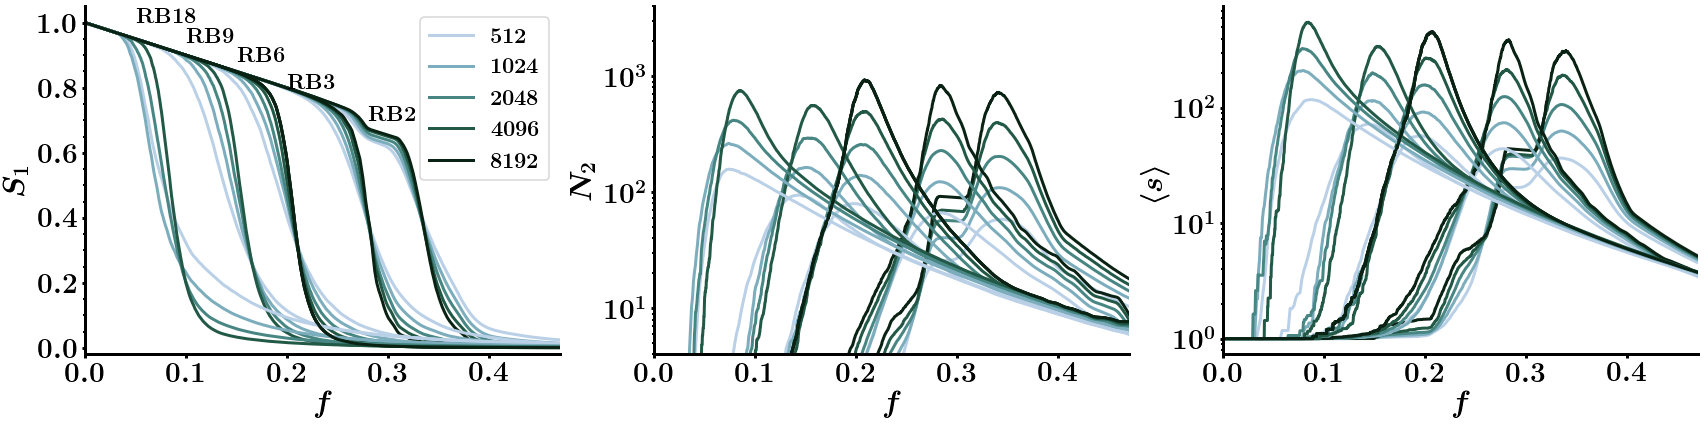

In [28]:
l_values = [2, 3, 6, 9, 18]
#attacks = ['BtwU'] + ['BtwU_cutoff{}'.format(i) for i in l_values]
attacks = ['BtwU_cutoff{}'.format(i) for i in l_values]
sizes = [512, 1024, 2048, 4096, 8192]
colors = sns.cubehelix_palette(len(N_values), start=2, rot=0.3, 
                               light=0.8, dark=0.1)

text_pos = {
    'BtwU': (0.02, 0.04),
    'BtwU_cutoff2': (0.28, 0.7),
    'BtwU_cutoff3': (0.20, 0.8),
    'BtwU_cutoff6': (0.15, 0.88),
    'BtwU_cutoff9': (0.1, 0.94),
    'BtwU_cutoff12': (0.05, 1),
    'BtwU_cutoff15': (0.05, 1),
    'BtwU_cutoff18': (0.05, 1)
}

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for ax in axes.flatten():
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0, 0.47)
    sns.despine()
    
ax = axes[0]
ax.set_ylabel(r'$S_1$')
ax.set_ylim(-0.02, 1.05)

ax = axes[1]
ax.set_ylabel(r'$N_2$')
ax.set_yscale('log')
ax.set_ylim((4, 4000))

ax = axes[2]
ax.set_ylabel(r'$\langle s \rangle$')
ax.set_yscale('log')

dfs = {}

for j, attack in enumerate(attacks):
    x, y = text_pos[attack]
    axes[0].text(x, y, attack_dict[attack], fontsize=22)
    
    for N in sizes:
        try:
            dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=1000)
        except FileNotFoundError:
            continue
            
    N_values = np.array(list(dfs.keys()))
    L_values = np.sqrt(N_values)
    
    for i, N in enumerate(N_values):
        if attack == 'BtwU_cutoff2':
            label = r'${{{}}}$'.format(N)
        else:
            label = ''
        df = dfs[N]
        axes[0].plot(df.f, df.Sgcc, '-', label=label, color=colors[i])
        axes[1].plot(df.f, df.Nsec, '-', color=colors[i])
        axes[2].plot(df.f, df.meanS, '-', color=colors[i])
        #axes[3].plot(df.f, np.abs(df.chiDelta), '-', color=colors[i])
        
axes[0].legend(loc='best', fontsize=22)
plt.tight_layout()    
fig_name = os.path.join(fig_dir, 'fig1_' + net_type)
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

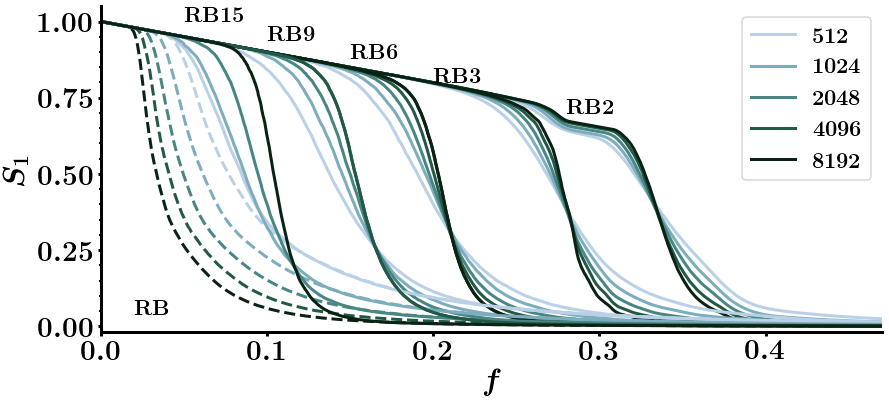

In [27]:
l_values = [2, 3, 6, 9, 15]
attacks = ['BtwU'] + ['BtwU_cutoff{}'.format(i) for i in l_values]
#attacks = ['BtwU_cutoff{}'.format(i) for i in l_values]
sizes = [512, 1024, 2048, 4096, 8192]
colors = sns.cubehelix_palette(len(N_values), start=2, rot=0.3, 
                               light=0.8, dark=0.1)

text_pos = {
    'BtwU': (0.02, 0.04),
    'BtwU_cutoff2': (0.28, 0.7),
    'BtwU_cutoff3': (0.20, 0.8),
    'BtwU_cutoff6': (0.15, 0.88),
    'BtwU_cutoff9': (0.1, 0.94),
    'BtwU_cutoff12': (0.05, 1),
    'BtwU_cutoff15': (0.05, 1)
}

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(14*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.set_xlabel(r'$f$')
ax.set_xlim(0, 0.47)
sns.despine()
ax.set_ylabel(r'$S_1$')
ax.set_ylim(-0.02, 1.05)

dfs = {}

for j, attack in enumerate(attacks):
    x, y = text_pos[attack]
    ax.text(x, y, attack_dict[attack], fontsize=22)
    
    for N in sizes:
        try:
            dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=1000)
        except FileNotFoundError:
            continue
            
    N_values = np.array(list(dfs.keys()))
    L_values = np.sqrt(N_values)
    
    for i, N in enumerate(N_values):
        if attack == 'BtwU_cutoff2':
            label = r'${{{}}}$'.format(N)
        else:
            label = ''
        df = dfs[N]
        if attack == 'BtwU':
            ax.plot(df.f, df.Sgcc, '--', label=label, color=colors[i])
        else:
            ax.plot(df.f, df.Sgcc, '-', label=label, color=colors[i])
        
ax.legend(loc='best', fontsize=22)

fig_name = os.path.join(fig_dir, 'fig1_' + net_type)
plt.savefig(fig_name + '.png')

plt.show()

MR
CIU
CIU2
BtwU_cutoff2
BtwU_cutoff3
DT
CIU
CIU2
BtwU_cutoff2
BtwU_cutoff3


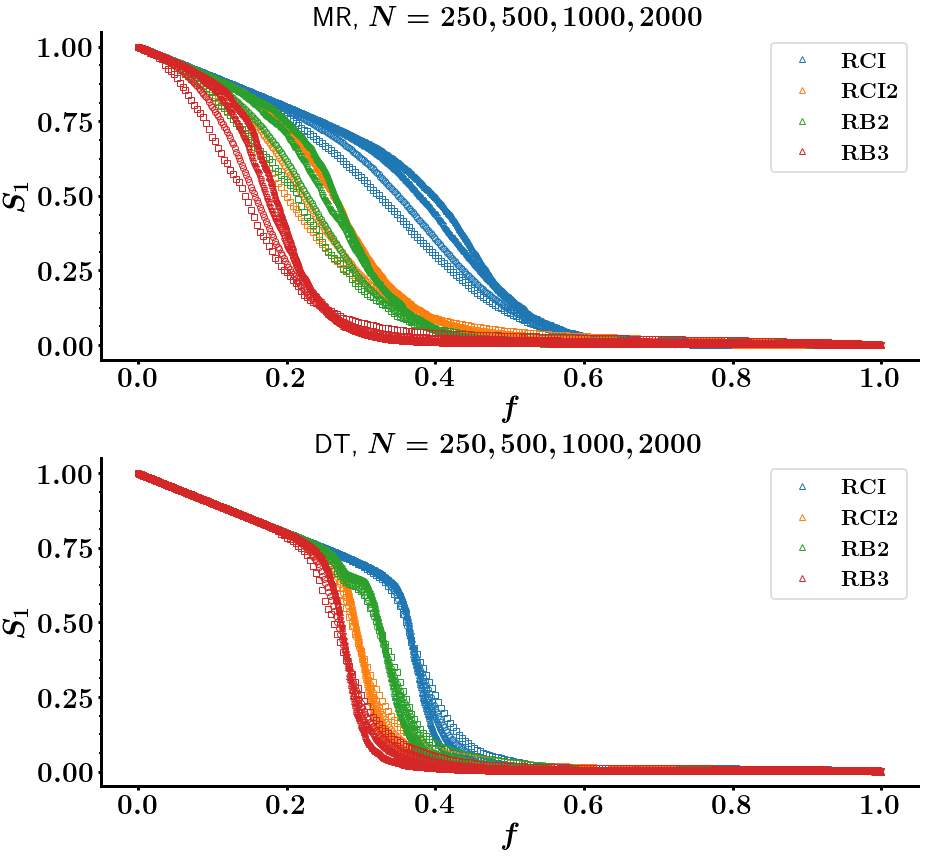

In [129]:
#attacks = ['Ran', 'DegU', 'BtwU']
attacks = ['CIU', 'CIU2', 'BtwU_cutoff2', 'BtwU_cutoff3']

N_values_per_attack = {
    'Ran': [250, 500, 1000, 2000, 16000],
    'DegU': [250, 500, 1000, 2000],
    'BtwU': [250, 500, 1000, 2000],
    'CIU': [250, 500, 1000, 2000],
    'CIU2': [250, 500, 1000, 2000],
    'BtwU_cutoff2': [250, 500, 1000, 2000],
    'BtwU_cutoff3': [250, 500, 1000, 2000]
}

ncols = 1
nrows = 2
fig, axes = plt.subplots(figsize=(13*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for k, net_type in enumerate(['MR', 'DT']):
    print(net_type)
    ax = axes[k]
    ax.set_title(net_type + ', ' + r'$N = 250, 500, 1000, 2000$', fontsize=28)
    sns.despine()
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    #ax.set_xlim(0, 1)
    #ax.set_ylim(-0.02, 1)
    for j, attack in enumerate(attacks):
        print(attack)
        N_values = N_values_per_attack[attack]
        _, _, _, dfs = load_dfs(attack, N_values, param, net_type=net_type)         

        for i, N in enumerate(N_values):

            X = np.arange(N) / N
            Y = dfs[N]['Sgcc'] 

            if i == len(N_values) - 1:
                label = attack_dict[attack]
            else:
                label = ''
            ax.plot(X, Y, label=label, marker=markers[i], color=colors[j], fillstyle='none', linestyle='')
        #ax.plot(X, 1 - X, color='k', linestyle='-.')

    ax.legend(loc='best', fontsize=22)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'norrenbrock_fig1_2')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

DT
Ran
DegU
BtwU
BtwU_cutoff2
BtwU_cutoff3
BtwU_cutoff4
BtwU_cutoff5


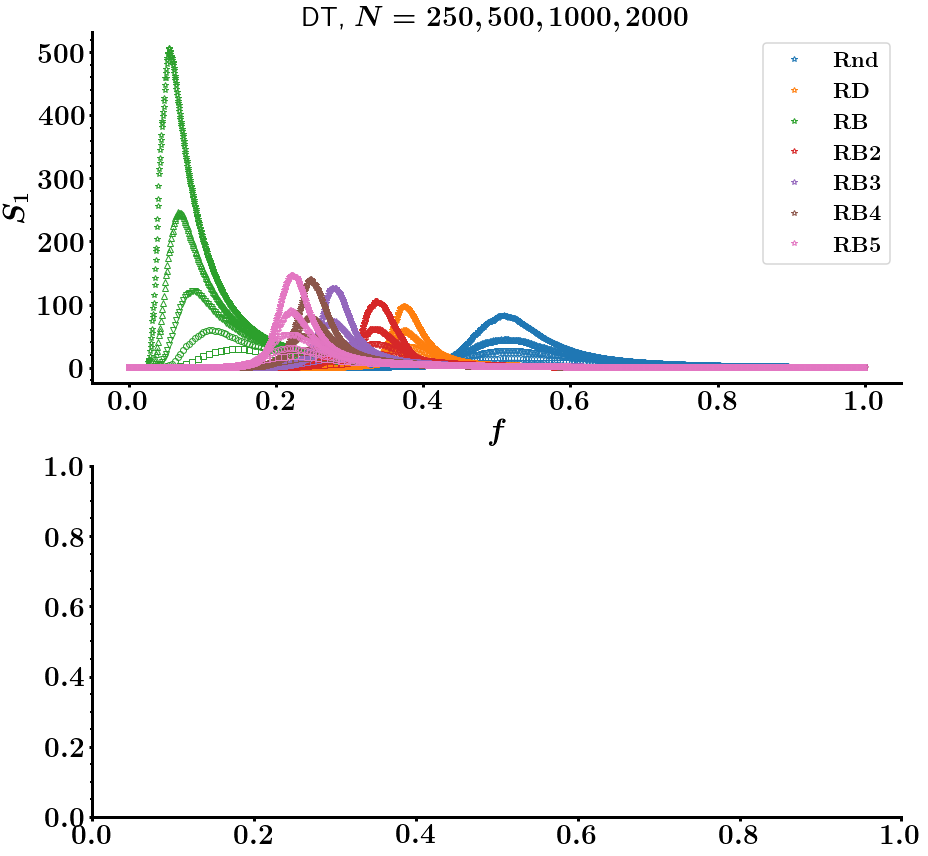

In [105]:
attacks = ['Ran', 'DegU', 'BtwU', 'BtwU_cutoff2', 'BtwU_cutoff3', 'BtwU_cutoff4', 'BtwU_cutoff5']
#attacks = ['CIU', 'CIU2', 'BtwU_cutoff2', 'BtwU_cutoff3']

_N_values = [128, 256, 512, 1024, 2048]
N_values_per_attack = {
    'Ran': _N_values,
    'DegU': _N_values,
    'BtwU': _N_values,
    'CIU': _N_values,
    'CIU2': _N_values,
    'BtwU_cutoff2': _N_values,
    'BtwU_cutoff3': _N_values,
    'BtwU_cutoff4': _N_values,
    'BtwU_cutoff5': _N_values
}

ncols = 1
nrows = 2
fig, axes = plt.subplots(figsize=(13*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for k, net_type in enumerate(['DT']):
    print(net_type)
    ax = axes[k]
    ax.set_title(net_type + ', ' + r'$N = 250, 500, 1000, 2000$', fontsize=28)
    sns.despine()
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    #ax.set_xlim(0, 1)
    #ax.set_ylim(-0.02, 1)
    for j, attack in enumerate(attacks):
        #print(attack)
        N_values = N_values_per_attack[attack]
        _, _, _, dfs = load_dfs(attack, N_values, param, net_type=net_type)         

        for i, N in enumerate(N_values):

            X = np.arange(N) / N
            Y = dfs[N]['meanS'] 

            if i == len(N_values) - 1:
                label = attack_dict[attack]
            else:
                label = ''
            ax.plot(X, Y, label=label, marker=markers[i], color=colors[j], fillstyle='none', linestyle='')
        #ax.plot(X, 1 - X, color='k', linestyle='-.')

    ax.legend(loc='best', fontsize=22)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'meanS_2')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


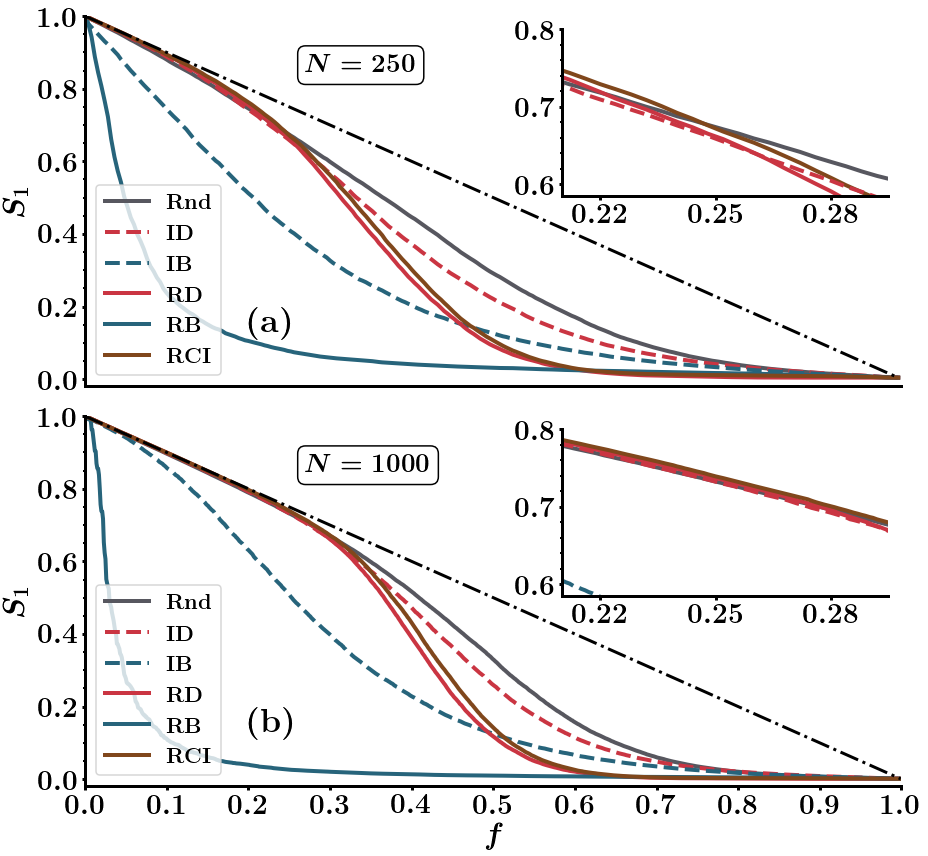

In [17]:
def plot_fig_order_param(dfs, N_values, inset=False):
    
    ncols = 1
    nrows = 2
    fig, axes = plt.subplots(figsize=(13*ncols, 6*nrows), ncols=ncols, nrows=nrows)

    for i, N in enumerate(N_values):
        ax = axes[i]
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel(r'$S_1$')
        if i == 1:
            ax.set_xlabel(r'$f$')
        X = np.arange(N) / N
        Y1 = dfs['BtwU'][N]['Sgcc'] 
        Y2 = dfs['DegU'][N]['Sgcc']
        Y4 = dfs['Btw'][N]['Sgcc'] 
        Y5 = dfs['Deg'][N]['Sgcc']
        Y3 = dfs['Ran'][N]['Sgcc']
        #Y6 = dfs['Eigenvector'][N]['Sgcc']
        #Y7 = dfs['EigenvectorU'][N]['Sgcc']
        #Y8 = dfs['CI'][N]['Sgcc']
        Y9 = dfs['CIU'][N]['Sgcc']
        #Y10 = dfs['BtwU_cutoff3'][N]['Sgcc']
        ax.set_xlim(0, 1)
        ax.set_ylim(-0.02, 1)
        if i == 1:
            ax.set_xticks(np.arange(0, 1.1, 0.1))
        else:
            ax.set_xticks([])
        ax.set_yticks(np.arange(0, 1.1, 0.2))
        ax.plot(X, Y3, label=r'$\mathrm{Rnd}$', color=attack_colors['R'], linewidth=4)
        ax.plot(X, Y5, label=r'$\mathrm{ID}$', color=attack_colors['D'], linewidth=4, linestyle='--')
        ax.plot(X, Y4, label=r'$\mathrm{IB}$', color=attack_colors['B'], linewidth=4, linestyle='--')
        #ax.plot(X, Y6, label=r'$\mathrm{IE}$', color=attack_colors['E'], linewidth=4, linestyle='--')
        #ax.plot(X, Y8, label=r'$\mathrm{RCI}$', color=attack_colors['C'], linewidth=4, linestyle='--')
        ax.plot(X, Y2, label=r'$\mathrm{RD}$', color=attack_colors['D'], linewidth=4)
        ax.plot(X, Y1, label=r'$\mathrm{RB}$', color=attack_colors['B'], linewidth=4)
        #ax.plot(X, Y7, label=r'$\mathrm{RE}$', color=attack_colors['E'], linewidth=4)
        ax.plot(X, Y9, label=r'$\mathrm{RCI}$', color=attack_colors['C'], linewidth=4)
        #ax.plot(X, Y10, label=r'$\mathrm{RB3}$', color=attack_colors['B3'], linewidth=4)
        ax.plot(X, 1 - X, color='k', linestyle='-.')

        bbox = {'boxstyle': 'round', 'fc': 'None'}
        if inset:
            ax.text(0.27, 0.85, r'$N = {{{:d}}}$'.format(N), fontsize=26, transform=ax.transAxes, bbox=bbox)
        else:
            ax.text(0.7, 0.45, r'$N\; = {{{:d}}}$'.format(N) + '\n' + r'$\langle k \rangle=4$', 
                    fontsize=26, transform=ax.transAxes, bbox=bbox)

            
        ax.text(0.2, 0.15, letters[i], fontsize=34, transform=ax.transAxes, 
                horizontalalignment='left')
        ax.legend(loc='lower left', fontsize=22)

        if inset:
            bbox_to_anchor = (.6, .55, .4, .45)
            axins = inset_axes(ax, width="100%", height="100%",
                    bbox_to_anchor=bbox_to_anchor,
                    bbox_transform=ax.transAxes)
            axins.spines['right'].set_visible(False)
            axins.spines['top'].set_visible(False)
            
            ## For meank = 4
            #axins.set_xlim(0.14, 0.217)
            #axins.set_ylim(0.585, 0.83)
            #axins.set_xticks([0.15, 0.18, 0.21])
            #axins.set_yticks([0.6, 0.7, 0.8])
            
            ## For meank = 5
            axins.set_xlim(0.21, 0.295)
            axins.set_ylim(0.585, 0.77)
            axins.set_xticks([0.22, 0.25, 0.28])
            axins.set_yticks([0.6, 0.7, 0.8])
            axins.plot(X, Y3, color=attack_colors['R'], linewidth=4)
            axins.plot(X, Y2, color=attack_colors['D'], linewidth=4)
            axins.plot(X, Y1, color=attack_colors['B'], linewidth=4)
            #axins.plot(X, Y7, color=attack_colors['E'], linewidth=4)
            axins.plot(X, Y9, color=attack_colors['C'], linewidth=4)
            axins.plot(X, Y5, color=attack_colors['D'], linewidth=4, linestyle='--')
            axins.plot(X, Y4, color=attack_colors['B'], linewidth=4, linestyle='--')
            #axins.plot(X, Y6, color=attack_colors['E'], linewidth=4, linestyle='--')
            #axins.plot(X, Y8, color=attack_colors['C'], linewidth=4, linestyle='--')
    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'percolation_two_sizes')
    plt.savefig(fig_name + '.png'.format(N))
    plt.savefig(fig_name + '.pdf'.format(N))
    plt.show()
    
meank = 5
N_values = [250, 1000]
dfs = {}
attacks = ['Ran', 'Deg', 'DegU', 'Btw', 'BtwU', 'CIU']
for attack in attacks:
    
    _, _, _, _dfs = load_dfs(attack, N_values, meank, net_type='MR')    
    dfs[attack] = _dfs
plot_fig_order_param(dfs, N_values, inset=True)

Ran
Deg
DegU
BtwU
CIU
CIU2
BtwU_cutoff2
BtwU_cutoff3
BtwU_cutoff4


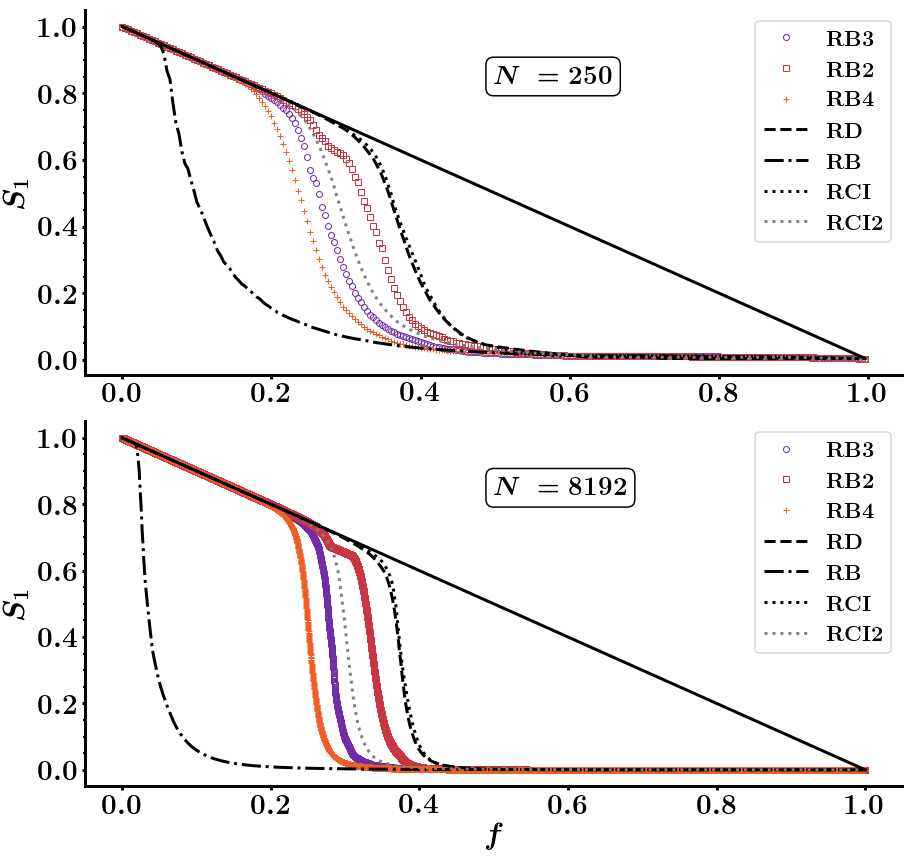

In [44]:
def plot_fig_order_param(dfs, N_values, net_type):

    ncols = 1
    nrows = 2
    fig, axes = plt.subplots(figsize=(13*ncols, 6*nrows), ncols=ncols, nrows=nrows)

    for i, N in enumerate(N_values):
        ax = axes[i]
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel(r'$S_1$')
        if i == 1:
            ax.set_xlabel(r'$f$')
        X = np.arange(N) / N
        if 'BtwU' in dfs:
            Y1 = dfs['BtwU'][N]['Sgcc'] 
        Y2 = dfs['DegU'][N]['Sgcc']
        #Y4 = dfs['Btw'][N]['Sgcc'] 
        Y5 = dfs['Deg'][N]['Sgcc']
        Y3 = dfs['Ran'][N]['Sgcc']
        #Y6 = dfs['Eigenvector'][N]['Sgcc']
        #Y7 = dfs['EigenvectorU'][N]['Sgcc']
        #Y8 = dfs['CI'][N]['Sgcc']
        Y9 = dfs['CIU'][N]['Sgcc']
        Y13 = dfs['CIU2'][N]['Sgcc']
        Y10 = dfs['BtwU_cutoff3'][N]['Sgcc']
        Y11 = dfs['BtwU_cutoff2'][N]['Sgcc']
        Y12 = dfs['BtwU_cutoff4'][N]['Sgcc']
        #ax.set_xlim(0.25, 0.36)
        #ax.set_ylim(-0.02, 0.82)
        #if i == 1:
        #    ax.set_xticks(np.arange(0.2, 0.4, 0.05))
        #else:
        #    ax.set_xticks([])
        #ax.set_yticks(np.arange(0, 1.1, 0.2))
        ax.set_prop_cycle(marker=['o', 's', '+', 'x', '^', '*', '.'])
        #ax.plot(X, Y3, '.', label=r'$\mathrm{Rnd}$', color=attack_colors['R'], linewidth=4)
        #ax.plot(X, Y2, label=r'$\mathrm{RD}$', color=attack_colors['D'], linestyle='', fillstyle='none')
        
        #ax.plot(X, Y1, label=r'$\mathrm{RB}$', color=attack_colors['B'], linestyle='', fillstyle='none')
        
        #ax.plot(X, Y7, label=r'$\mathrm{RE}$', color=attack_colors['E'], linestyle='', fillstyle='none')
        
        ax.plot(X, Y10, label=r'$\mathrm{RB3}$', color=attack_colors['B3'], linestyle='', fillstyle='none')
        ax.plot(X, Y11, label=r'$\mathrm{RB2}$', color=attack_colors['D'], linestyle='', fillstyle='none')
        ax.plot(X, Y12, label=r'$\mathrm{RB4}$', color=attack_colors['B4'], linestyle='', fillstyle='none')
        
        ax.plot(X, Y2, label=r'$\mathrm{RD}$', color='k', linestyle='--', marker='', linewidth=3)
        if 'BtwU' in dfs:
            ax.plot(X, Y1, label=r'$\mathrm{RB}$', color='k', linestyle='-.', marker='', linewidth=3)
        ax.plot(X, Y9, label=r'$\mathrm{RCI}$', color='k', linestyle=':', marker='', linewidth=3)
        ax.plot(X, Y13, label=r'$\mathrm{RCI2}$', color='grey', linestyle=':', marker='', linewidth=3)
        ax.plot(X, 1 - X, color='k', linestyle='-', marker='')

        bbox = {'boxstyle': 'round', 'fc': 'None'}
        ax.text(0.5, 0.8, r'$N\; = {{{:d}}}$'.format(N), 
                    fontsize=26, transform=ax.transAxes, bbox=bbox)

            
        #ax.text(0.2, 0.25, letters[i], fontsize=34, transform=ax.transAxes, 
        #        horizontalalignment='left')
        ax.legend(loc='best', fontsize=22)

    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'percolation_two_sizes_new_{}'.format(net_type))
    plt.savefig(fig_name + '.png'.format(N))
    plt.savefig(fig_name + '.pdf'.format(N))
    plt.show()
    
meank = 5
N_values = [250, 8192]
dfs = {}
attacks = [
    'Ran', 'Deg', 'DegU', #'Btw', 
    'BtwU', 'CIU', 'CIU2',
    'BtwU_cutoff2', 'BtwU_cutoff3', 'BtwU_cutoff4'
]
net_type = 'DT'
for attack in attacks:
    print(attack)
    _, _, _, _dfs = load_dfs(attack, N_values, meank, net_type=net_type)    
    dfs[attack] = _dfs
plot_fig_order_param(dfs, N_values, net_type)

Deg	0.4653 2.80 0.08
DegU	0.3401 3.38 0.21
Btw	0.5573 3.52 0.16
BtwU	0.2974 2.66 0.23


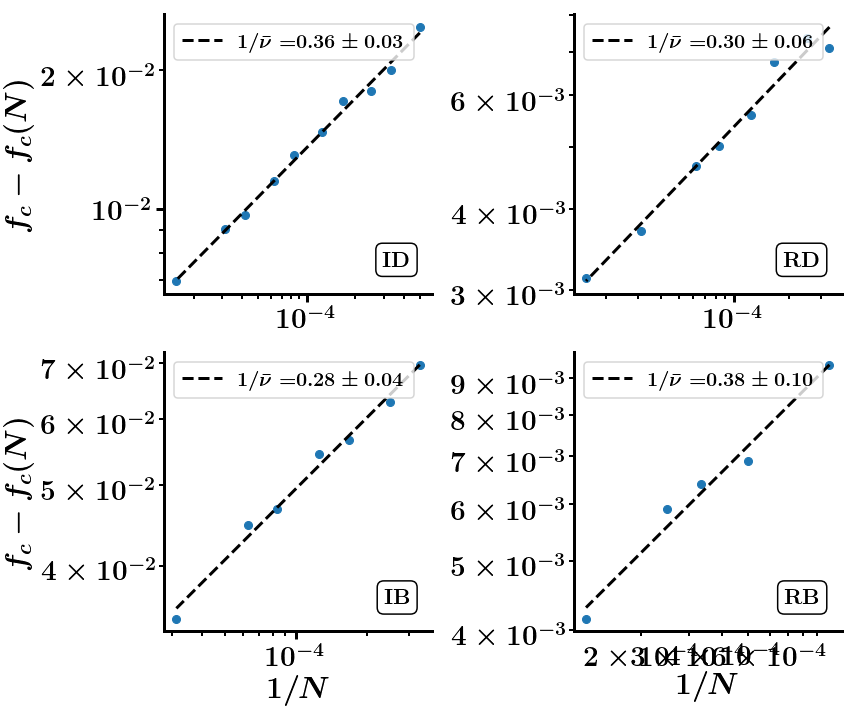

Deg	0.4653 3.19 0.12
DegU	0.3401 3.51 0.24
Btw	0.5573 3.55 0.12
BtwU	0.2974 3.06 0.38


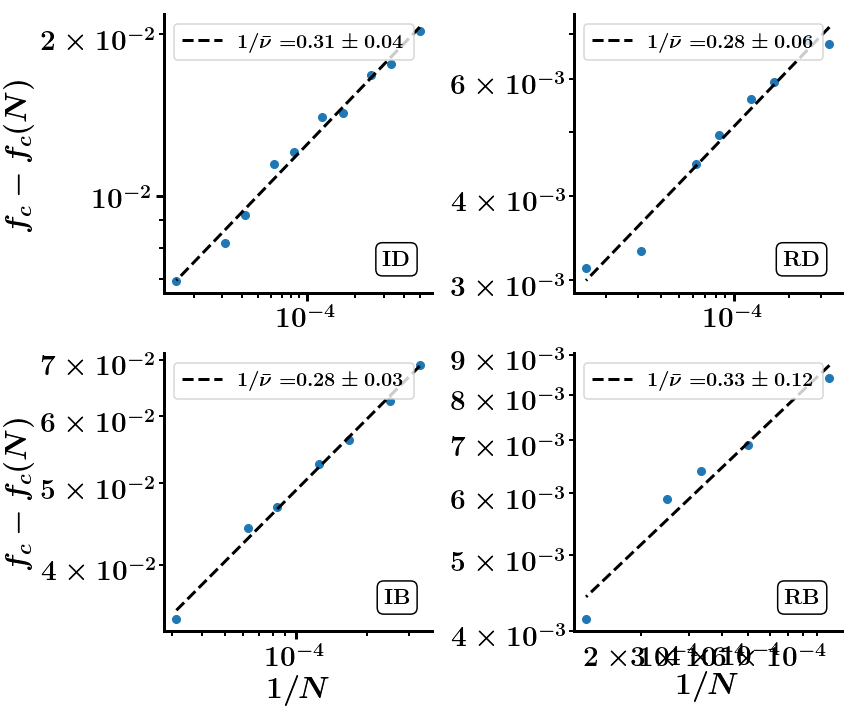

In [301]:
def plot_nu(measure):

    attacks = ['Deg', 'DegU', 'Btw', 'BtwU']
    marker_dict = {'meanS': 'o', 'Nsec': 's'}
    color_dict = {'meanS': colors[0], 'Nsec': colors[1]}
    linestyle_dict = {'meanS': '--', 'Nsec': '-.'}
    label_dict = {'meanS': r'$\langle s \rangle$', 'Nsec': r'$N_2$'}

    ncols = 2
    nrows = 2
    fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()

    for k, attack in enumerate(attacks):

        if attack == 'Deg':
            #N_values = [8000, 12000, 16000, 32000, 64000]
            N_values = [2000, 3000, 4000, 6000, 8000, 12000, 16000, 24000, 32000, 64000]
            fc_theo = 0.4653
            fmin = 0.44
            fmax = 0.49
        elif attack == 'DegU':
            N_values = [3000, 4000, 6000, 8000, 12000, 16000, 32000, 64000]
            fc_theo = 0.3401
            fmin = 0.334
            fmax = 0.345
        elif attack == 'Btw':
            N_values = [3000, 4000, 6000, 8000, 12000, 16000, 32000]
            fc_theo = 0.5573
            tolerance = fc_theo/500
            fmin = 0.5
            fmax = 0.6
        elif attack == 'BtwU':
            N_values = [1000, 2000, 3000, 4000, 8000]
            fc_theo = 0.2974
            tolerance = fc_theo/500
            fmin = 0.28
            fmax = 0.32

        dfs1000, dfs10000, dfs20000, dfsMax = load_dfs(attack, N_values, meank)
        dfs = {}
        _N_values = N_values
        for N in _N_values:
            dfs[N] = dfsMax[N]
        N_values = list(dfs.keys())
        
        #fc = compute_fc_v2(dfs, fmin, fmax)[0]
        #if attack == 'Deg' or attack == 'Btw':
        #    fc = fc_theo
        fc = fc_theo
                
        ax = axes[k]
        ax.tick_params(which='minor', length=5)
        ax.tick_params(which='major', length=8)
        
        
        measure_values = get_critical_measures(dfs, measure, fc='peak')
        Y_pred, slope, y_err = getLinearReg(N_values, measure_values)
        if measure == 'Nsec':
            beta_over_nu = 1 - slope
        elif measure == 'meanS':
            gamma_over_nu = slope

        if k in [0, 2]:
            #ax.set_ylabel(r'$N_2\; \mathrm{ and }\; \langle s \rangle$')
            ax.set_ylabel(r'$f_c - f_c(N)$')
        if k in [2, 3]:
            ax.set_xlabel(r'$1/N$')


        ax.set_xscale('log')
        ax.set_yscale('log')

        fc_values, peak_values = getPeaks(dfs, measure)
        fc_diff = fc - np.array(fc_values)
        one_over_N_values = 1/np.array(N_values)
        ax.plot(one_over_N_values, fc_diff, 'o', markersize=8)
        Y_pred, slope, y_err = getLinearReg(one_over_N_values, fc_diff)

        label = r'$1/\bar{\nu} = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
        ax.plot(one_over_N_values, Y_pred, '--', color='k', label=label)

        bbox = {'boxstyle': 'round', 'fc': 'None'}
        ax.text(0.92, 0.1, attack_dict[attack], fontsize=22, 
                transform=ax.transAxes, horizontalalignment='right', bbox=bbox)

        ax.legend(fontsize=20, loc=2)
        
        #fc_16k = dict(zip(N_values, fc_values))[16000]
        #print('{}\t{:.4f} {:.2f} {:.2f} fc(16000) = {:.4f}'.format(attack, fc, 1/slope, y_err/(3*slope**2), fc_16k))
        print('{}\t{:.4f} {:.2f} {:.2f}'.format(attack, fc, 1/slope, y_err/(3*slope**2)))
        
        ax.set_xticks([1e-4])
        
    sns.despine()
    plt.tight_layout()

    fig_name = os.path.join(fig_dir, 'nu_' + measure)
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')

    plt.show()
    
measures = ['meanS', 'Nsec']
for measure in measures:
    plot_nu(measure)

Ran [ 128  256  512 1024 2048 4096] [0.53125, 0.51953125, 0.513671875, 0.5146484375, 0.50927734375, 0.5126953125]
BtwU [ 128  256  512 1024 2048 4096] [0.1484375, 0.11328125, 0.0859375, 0.068359375, 0.0546875, 0.046630859375]
BtwU_cutoff2 [ 128  256  512 1024 2048 4096] [0.34375, 0.3359375, 0.333984375, 0.3349609375, 0.3349609375, 0.3359375]
BtwU_cutoff3 [ 128  256  512 1024 2048 4096] [0.28125, 0.27734375, 0.27734375, 0.27734375, 0.27880859375, 0.28076171875]
BtwU_cutoff4 [ 128  256  512 1024 2048 4096] [0.25, 0.24609375, 0.244140625, 0.2470703125, 0.24853515625, 0.24951171875]
BtwU_cutoff5 [ 128  256  512 1024 2048 4096] [0.2265625, 0.21875, 0.21875, 0.21875, 0.22216796875, 0.22509765625]


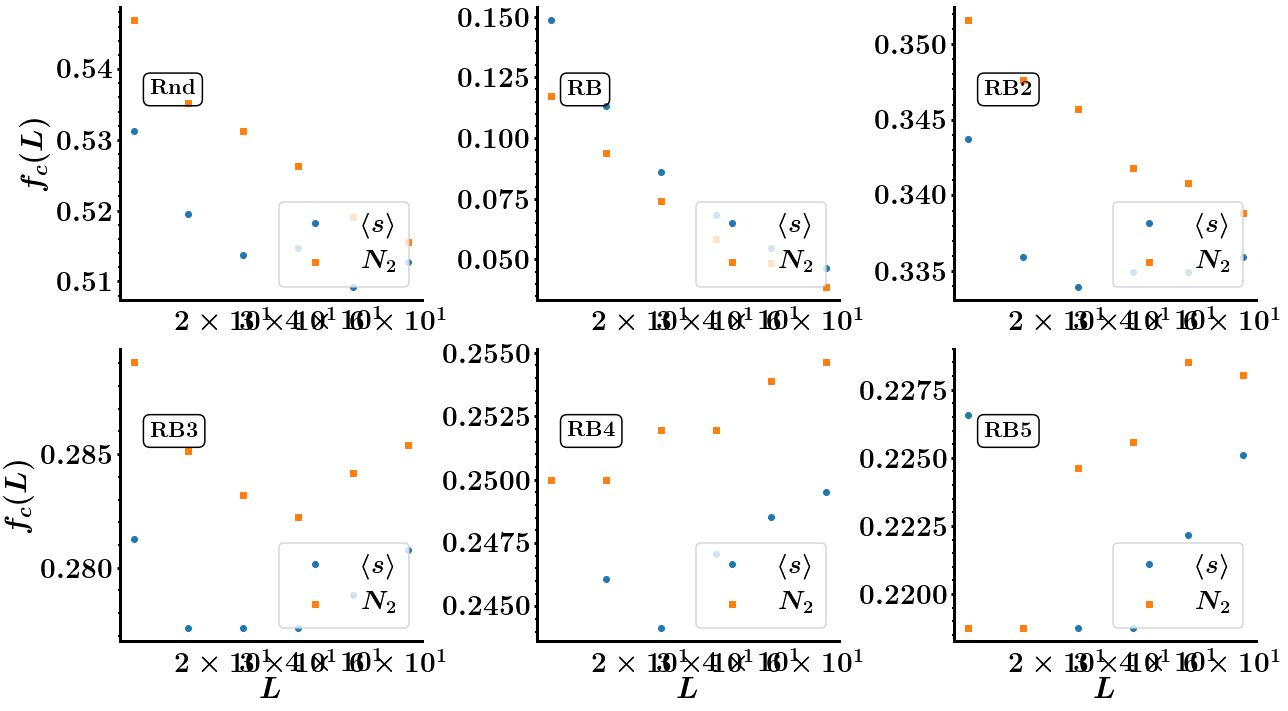

In [2]:
def plot_fc_N():
    from mpl_settings_v3 import colors

    measures = ['meanS', 'Nsec']
    attacks = ['Ran', 'BtwU'] + ['BtwU_cutoff{}'.format(i) for i in range(2, 6)]
    marker_dict = {'meanS': 'o', 'Nsec': 's'}
    color_dict = {'meanS': colors[0], 'Nsec': colors[1]}
    linestyle_dict = {'meanS': '--', 'Nsec': '-.'}
    fillstyle_dict = {'meanS': '', 'Nsec': 'none'}

    ncols = 3
    nrows = len(attacks)%ncols + len(attacks)//ncols
    fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()

    sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
    for k, attack in enumerate(attacks):

        dfs = {}
        for N in sizes:
            try:
                dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=10000)
            except FileNotFoundError:
                continue
        N_values = np.array(list(dfs.keys()))
        L_values = np.sqrt(N_values)

        ax = axes[k]
        if k%ncols == 0:
            ax.set_ylabel(r'$f_c(L)$')
        if k >= (nrows-1)*ncols:
            ax.set_xlabel(r'$L$')

        ax.set_xscale('log')

        for measure in measures:
            fc_values, peak_values = getPeaks(dfs, measure)
            if measure == 'meanS':
                print(attack, N_values, fc_values)
        
            ax.plot(L_values, fc_values, marker_dict[measure],  markersize=6, label=measures_dict[measure])

        bbox = {'boxstyle': 'round', 'fc': 'None'}
        ax.text(0.1, 0.7, attack_dict[attack], fontsize=22, 
                transform=ax.transAxes, horizontalalignment='left', bbox=bbox)      
    
        ax.legend(loc=4)
    sns.despine()
    plt.tight_layout()

    fig_name = os.path.join(fig_dir, 'fc_L_' + net_type)
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')

    plt.show()
    
plot_fc_N()

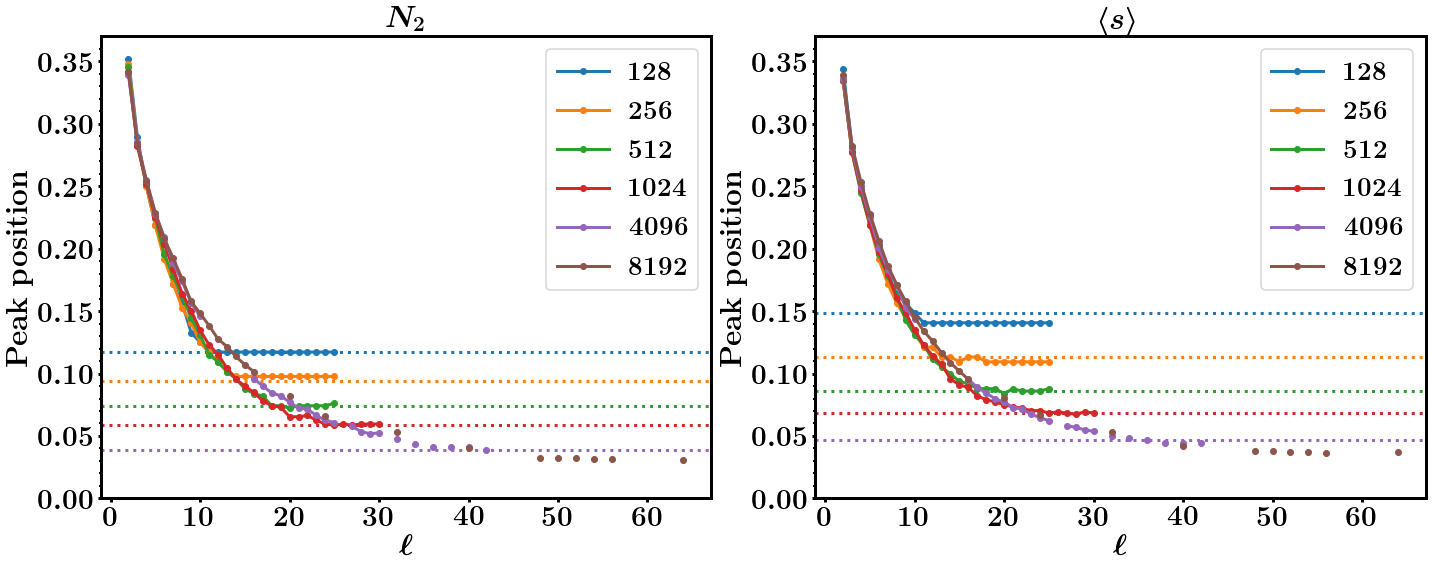

In [7]:
from mpl_settings_v3 import colors 

net_type = 'DT'
param = 'param'
#attacks = ['BtwU_cutoff{}'.format(i) for i in range(2, 6)]
n_seeds = 10000
N_values = [128, 256, 512, 1024, 4096, 8192]
Bi_range = np.arange(2, 70)
measures = ['Nsec',  'meanS']
peak_positions = {}
peak_positions_inf = {}
for measure in measures:
    peak_positions[measure] = {}
    peak_positions_inf[measure] = {}
    for N in N_values:
        peak_positions[measure][N] = []
        for l in Bi_range:
            attack = 'BtwU_cutoff{}'.format(l)
            try:
                df = load_dataframe(net_type, N, param, attack)
                try:
                    idx = df[measure].idxmax()
                    peak_pos = df.f[idx]
                except:
                    print(df[measure])
                    print(attack, N)
                    raise
                
            except FileNotFoundError:
                peak_pos = np.NaN

            
            peak_positions[measure][N].append(peak_pos)
        attack = 'BtwU'
        try:
            df = load_dataframe(net_type, N, param, attack, min_nseeds=10000)
            idx = df[measure].idxmax()
            peak_pos = df.f[idx]
            peak_positions_inf[measure][N] = peak_pos
        except FileNotFoundError:
            peak_positions_inf[measure][N] = np.NaN


ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

for j, measure in enumerate(measures):
    ax = axes[j]
    #ax.set_xlim(1, 5)
    #ax.set_ylim(0.2, 0.3)
    ax.set_ylim(0, 0.37)
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$\mathrm{Peak\;position}$')
    ax.set_title(measures_dict[measure], fontsize=30)
    for i, N in enumerate(N_values):
        #ax.set_yscale('log')
        #ax.set_xscale('log')
        #ax.axvline(diameters[i], linestyle='--', color=colors[i])
        ax.plot(Bi_range, peak_positions[measure][N], 'o-', 
        #ax.plot(Bi_range, peak_positions[measure][N]-peak_positions_inf[measure][N], 'o-', 
                color=colors[i], label=r'${{{}}}$'.format(N))
        #ax.scatter(0, meanS_peak_positions_inf[measure][N], color=colors[i])
        ax.axhline(peak_positions_inf[measure][N], linestyle=':', color=colors[i])
    ax.legend()
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_RBl_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

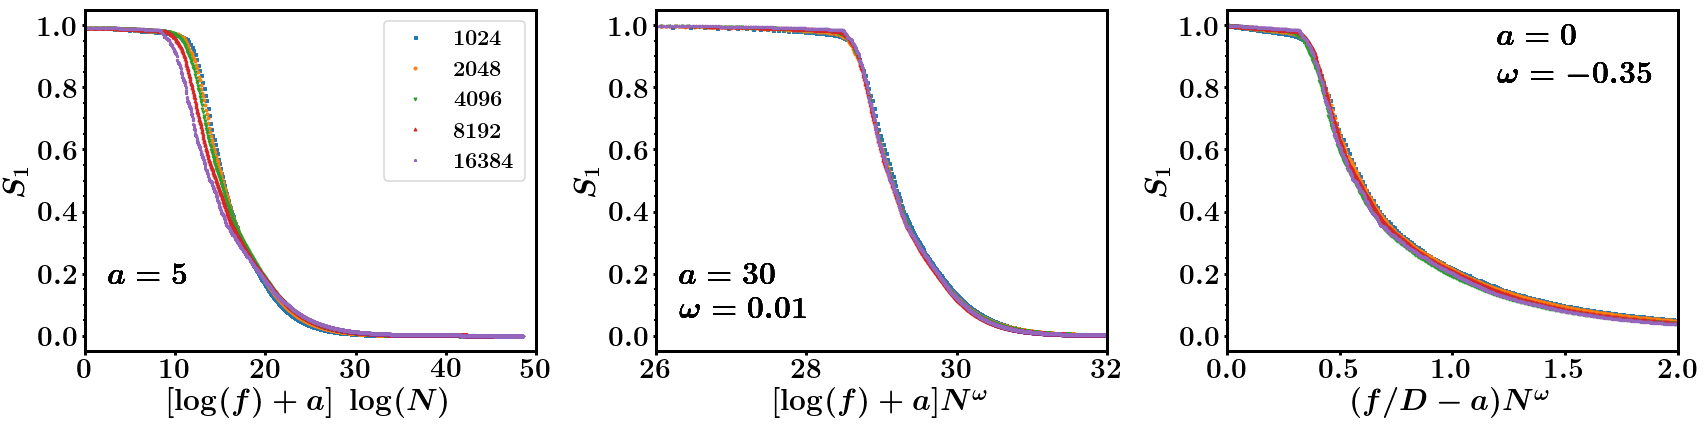

In [397]:
ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

axes = axes.flatten()

ax = axes[0]
ax.set_ylabel(r'$S_1$')
ax.set_xlabel(r'$[\log(f) + a]\;\log(N)$')
ax.set_xlim(0, 50)

ax = axes[1]
ax.set_ylabel(r'$S_1$')
ax.set_xlabel(r'$[\log(f) + a]N^{\omega}$')
ax.set_xlim(26, 32)

for i, N in enumerate([1024, 2048, 4096, 8192, 16384]):

    attack = 'BtwU'
    df = load_dataframe(net_type, N, param, attack)
    
    ax = axes[0]
    a = 5
    e2 = 0.00
    ax.plot(
        (np.log(df.f[1:])+a)*np.log(N), df.Sgcc[1:]*N**e2, linestyle='', 
        marker=markers[i], markersize=3, label=r'${{{}}}$'.format(N)
    )
    ax.text(0.05, 0.2, r'$a = {{{:.0f}}}$'.format(a), transform=ax.transAxes, fontsize=30)
    ax.legend(fontsize=22)
    ax = axes[1]
    e = 0.01
    a = 30
    e2 = 0.00
    ax.plot(
        (np.log(df.f[1:])+a)*N**e, df.Sgcc[1:], linestyle='', 
        marker=markers[i], markersize=3, label=r'${{{}}}$'.format(N)
    )
    ax.text(0.05, 0.2, r'$a = {{{:.0f}}}$'.format(a), transform=ax.transAxes, fontsize=30)
    ax.text(0.05, 0.1, r'$\omega = {{{:.2f}}}$'.format(e), transform=ax.transAxes, fontsize=30)
    
    if False:
        ax = axes[3]
        ax.set_ylabel(r'$S_1$')
        ax.set_xlabel(r'$(f N - a) N^{-0.5}$')
        #ax.set_xlim(0, 10)
        a = 500
        ax.plot(
            (df.f*N-a)/N**0.5, df.Sgcc, linestyle='', 
            marker=markers[i], markersize=3, label=r'${{{}}}$'.format(N)
        )  
        ax.text(0.05, 0.2, r'$a = {{{:.0f}}}$'.format(a), transform=ax.transAxes, fontsize=30)
        ax.text(0.05, 0.1, r'$\omega = {{{:.2f}}}$'.format(e), transform=ax.transAxes, fontsize=30)
    
    ax = axes[2]
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$(f/D-a) N^\omega$')
    #ax.set_xlim(0, 50)
    ax.set_xlim(0, 2)
    a = 0
    e = -0.35
    ax.plot(
        (df.f*N/diameters[i]-a)*N**e, df.Sgcc, linestyle='', 
        marker=markers[i], markersize=3, label=r'${{{}}}$'.format(N)
    )  
    ax.text(0.6, 0.9, r'$a = {{{:.0f}}}$'.format(a), transform=ax.transAxes, fontsize=30)
    ax.text(0.6, 0.8, r'$\omega = {{{:.2f}}}$'.format(e), transform=ax.transAxes, fontsize=30)

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'Sgcc_scaling_RB_f_renormalized_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

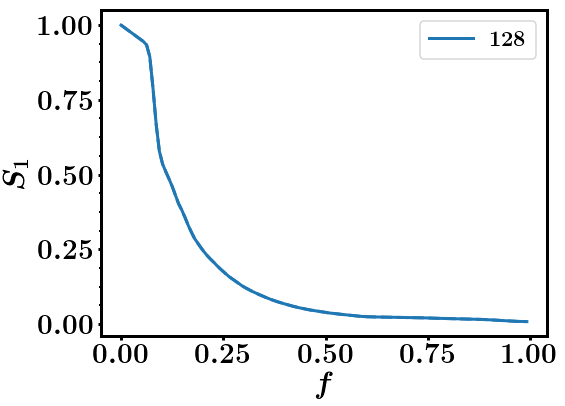

In [21]:
net_type = 'DT'
param = 'param'
n_seeds = 1000
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.set_ylabel(r'$S_1$')
#ax.set_xlim(0, 0.2)
ax.set_xlabel(r'$f$')

for j, N in enumerate([128]):

    linestyles = ['-', '--']
    labels = [r'${{{}}}$'.format(N), '']
    for i, attack in enumerate(['BtwWU', 'BtwWU_cutoff2']):
        try:
            df = load_dataframe(attack, N, param, net_type=net_type, fast=True, n_seeds=n_seeds)
        except:
            df = load_dataframe(attack, N, param, net_type=net_type, fast=True, n_seeds=n_seeds//10)

        ax.plot(df.f, df.Sgcc, linestyles[i], color=colors[j], label=labels[i])#, marker=markers[i], markersize=3,
                #label=r'${{{}}}$'.format(N))#, color='k')

ax.legend(fontsize=22)
#plt.tight_layout()
#fig_name = os.path.join(fig_dir, '{}_RB_scaling_nu'.format(net_type, nu))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

Nsec [0.1171875, 0.09375, 0.07421875, 0.05859375, 0.038818359375, nan]


LinAlgError: SVD did not converge in Linear Least Squares

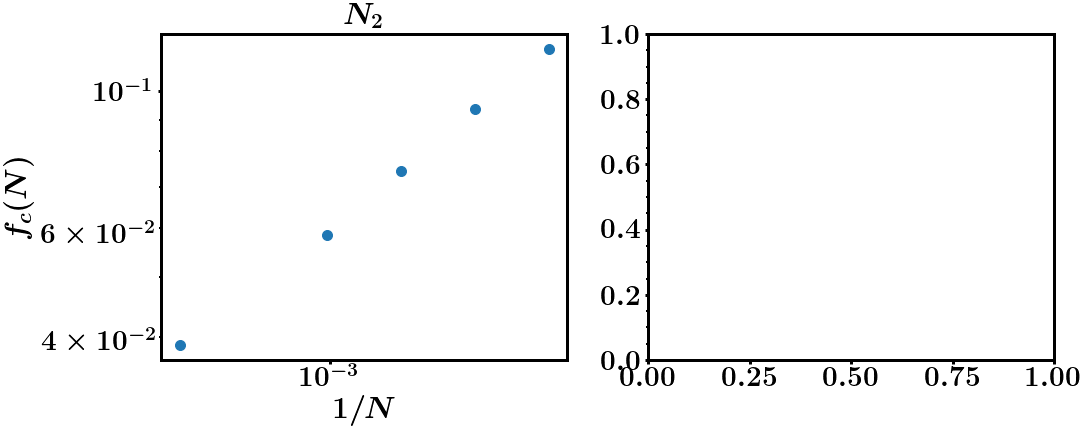

In [11]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
for i, measure in enumerate(measures):
    ax = axes[i]
    ax.set_title(measures_dict[measure], fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$1/N$')
    ax.set_ylabel(r'$f_c(N)$')
    X = 1/np.array(N_values)
    Y = [peak_positions_inf[measure][N] for N in N_values]
    ax.plot(X, Y, 'o', markersize=10)
    print(measure, Y)
    Y_pred, slope, y_err = getLinearReg(X, Y)
    
    c = Y[0] / X[0]**slope
    label = r'$1/\theta = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '-.', color='k', label=label)
    ax.legend()

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'nu_scaling_RB_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.show()

l = 2
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
for i, measure in enumerate(measures):
    ax = axes[i]
    ax.set_title(measures_dict[measure], fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$1/N$')
    ax.set_ylabel(r'$f_c(N)-f_c$')
    X = 1/np.array(N_values)
    #Y = [peak_positions[measure][N][0]-0.334 for N in N_values]
    Y = [peak_positions[measure][N][7]-0.2714 for N in N_values]
    #Y = [peak_positions[measure][N][2]-0.242 for N in N_values]
    print([peak_positions[measure][N][7] for N in N_values])
    print(Y)
    ax.plot(X, Y, 'o', markersize=7)
    
    Y_pred, slope, y_err = getLinearReg(X, Y)
    
    c = Y[0] / X[0]**slope
    label = r'$1/\theta = $' + r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '-.', color='k', label=label)
    ax.legend()
plt.tight_layout()
plt.show()

In [260]:
h = ig.Graph().Erdos_Renyi(100, 0.01)
g = h.copy()
print(g.summary())
g.delete_vertices(0)
print(g.vcount(), h.vcount())

IGRAPH U--- 100 42 -- 
99 100


In [344]:
def cayley_tree(order, depth):
    if depth == 0:
        return ig.Graph(1)
    if depth == 1:
        return ig.Graph.Tree(order+1, order)
    d = order - 1
    n1, n2 = d ** (depth+1) - 1, d ** depth - 1
    n1 = n1 // d-1
    n2 = n2 // d-1
    return ig.Graph.Tree(n1, d) + ig.Graph.Tree(n2, d) 


g = cayley_tree(3, 2)
g.summary()

'IGRAPH U--- 2 1 -- '

In [352]:
g = ig.Graph.Tree(13, 2)
print(g.summary())
layout = g.layout('tree')
ig.plot(g, layout=layout)

IGRAPH U--- 13 12 -- 


AttributeError: 'bytes' object has no attribute 'encode'

In [3]:

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

#c1='#1f77b4' #blue
c1 = 'black'
c2='white' #green

def get_btw_colormap(btw_values, bins):

    bin_size = max(btw_values) / bins
    bin_size
    
    membership = [int(b/bin_size) for b in btw_values]
    
    btw_colors = [colorFader(c1,c2,x/bins) for x in membership]

    return membership, btw_colors

In [13]:
N = 10000
g = create_proximity_graph('DT', N=N)
position = np.array(g.vs['position'])
btw_values = g.betweenness(directed=False)

In [5]:
bins = 10
membership, btw_color = get_btw_colormap(btw_values, bins)
g.vs['color'] = btw_color

In [6]:
from planar import distance
edge_weights = []
for e in g.es():
    s,t = e.tuple
    #print(position[s], position[t], distance(s,t,position))
    edge_weights.append(distance(s,t,position))
    
w_btw_values = g.betweenness(directed=False, weights=edge_weights, nobigint=False)
btw_values = g.betweenness(directed=False, nobigint=False)

In [16]:
sorted_btw_values = sorted([(p, b) for (p, b) in zip(position, btw_values)], key=lambda x: x[1])

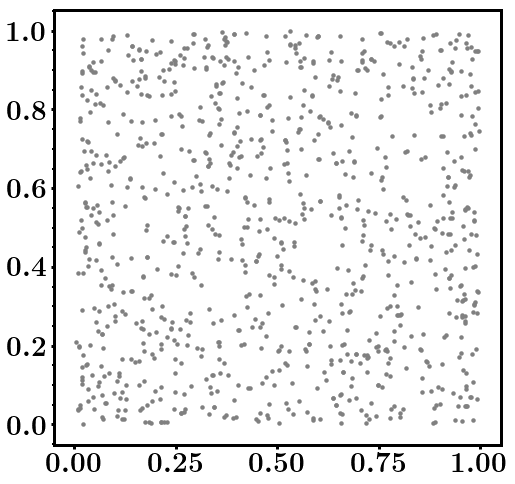

In [25]:
from matplotlib import collections  as mc

lines = []
for e in g.es():
    s, t = e.tuple
    line = (g.vs(s)['position'][0], g.vs(t)['position'][0])
    lines.append(line)

c_values = [(1,0,0,1)]*(N//2) + [(0,1,0,1)]*(N//2)    
#_colors = ['k' if b > 0.9*max(btw_values) else 'white' for b in btw_values]
#lc = mc.LineCollection(lines, colors='grey', linewidth=1, linestyle='-')#, colors=btw_color, linewidths=membership)
fig, ax = plt.subplots(figsize=(8,8))
#ax.add_collection(lc)
#for i, (x,y) in enumerate(position):
for (i, ((x,y), b)) in enumerate(sorted_btw_values):
    if i > 0.1*N:
        continue
    #ax.scatter(x,y, color=btw_color[i], marker='o')
    #c = 'k' if btw_values[i] >0.9*max(btw_values) else 'grey'
    #m = 'o' if btw_values[i] >0.9*max(btw_values) else '.'
    c = 'k' if i > 0.9*N else 'grey'
    m = '.' if i > 0.9*N else '.'
    ax.scatter(x,y, color=c, marker=m)

ax.autoscale()
ax.margins(0.05)

plt.show()

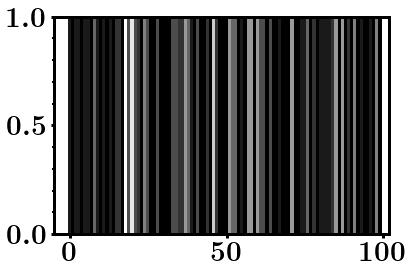

In [68]:
for i in range(N):
    plt.axvline(i, color=btw_color[i], linewidth=4)

In [49]:
N = 100
g = ig.Graph().Lattice(dim=[N], circular=False)
print(g.summary())

h = g.copy()
h.add_edges([(20, 30)])
print(h.summary())

btw_values_g = {}
btw_values_h = {}

btw_values_g['inf'] = g.betweenness()
btw_values_h['inf'] = h.betweenness()
l_values = np.arange(2, 10)
l_values = [10, 50, 100]
for l in l_values:
    btw_values_g[l] = g.betweenness(cutoff=l)
    btw_values_h[l] = h.betweenness(cutoff=l)

IGRAPH U--- 100 99 -- 
IGRAPH U--- 100 100 -- 


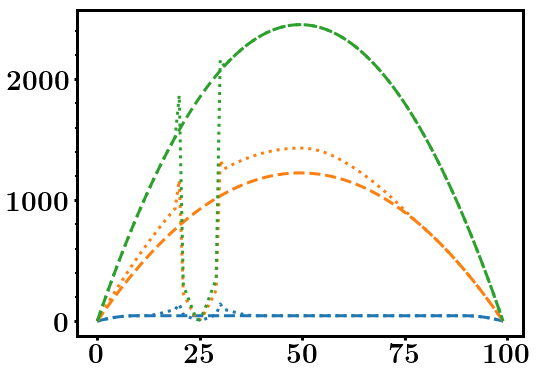

In [50]:
ncols=1
nrows=1
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
#print(np.histogram(btw_values))
ax = axes
#ax.plot(range(N), btw_values_g['inf'])
for i, l in enumerate(l_values): 
    ax.plot(range(N), btw_values_g[l], color=colors[i], linestyle='--', label=l)
    ax.plot(range(N), btw_values_h[l], color=colors[i], linestyle=':')
plt.show()

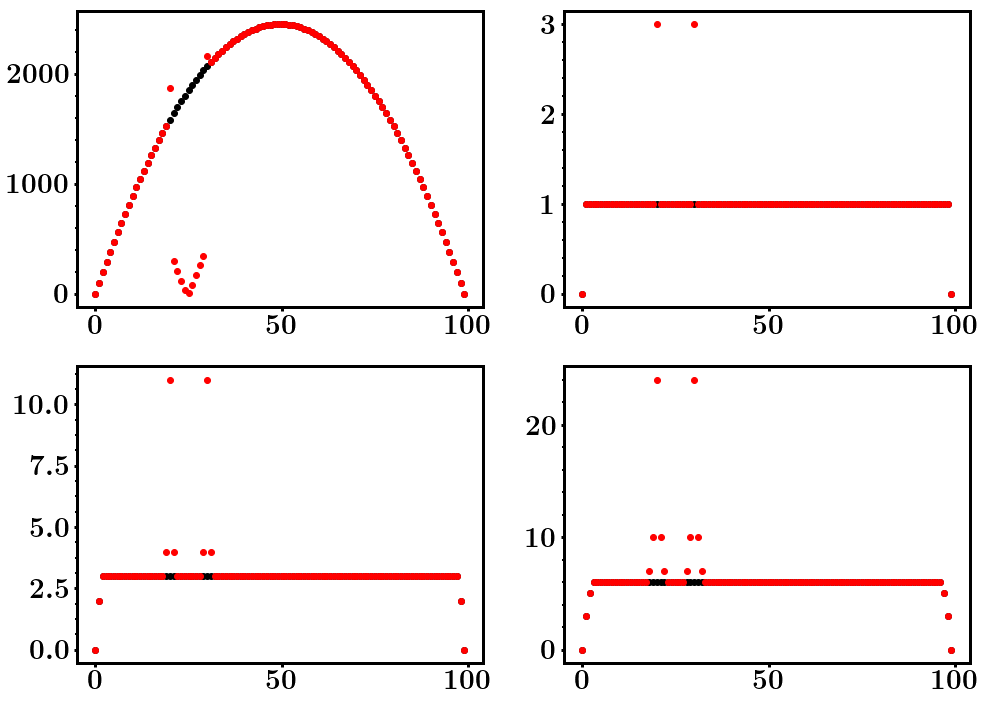

In [38]:
ncols=2
nrows=2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
#print(np.histogram(btw_values))
ax = axes[0][0]
ax.plot(range(N), btw_values_g['inf'], 'o', color='k')
ax.plot(range(N), btw_values_h['inf'], 'o', color='red')

for i, ax in enumerate(axes.flatten()[1:]):
    l = i + 2
    ax.plot(range(N), btw_values_g[l], 'o', color='k')
    ax.plot(range(N), btw_values_h[l], 'o', color='red')
plt.show()

In [205]:
N = 100000
meank = 4
p = meank / N
g = ig.Graph().Erdos_Renyi(N, p)

D = g.diameter()
print(D)

18


In [206]:
l_values = [2, 3, 4, 5, 6, 7, 8, 10, 16]
btw_cutoff_values = {}
for l in l_values:
    print(l)
    btw_cutoff_values[l] = g.betweenness(directed=False, cutoff=l)

2
3
4
5
6
7
8


KeyboardInterrupt: 

KeyError: 8

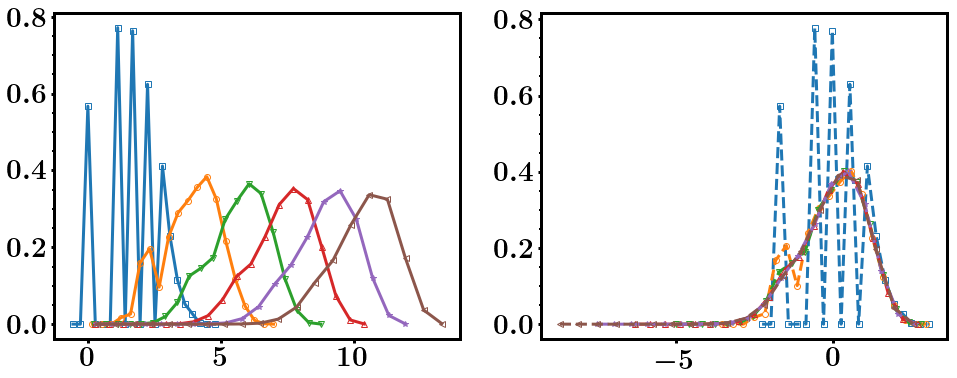

In [207]:
ncols = 2
fig, axes = plt.subplots(figsize=(8*ncols,6), ncols=ncols)

for i, l in enumerate(l_values):
    btw_values = np.array(btw_cutoff_values[l])
    btw_values = btw_values[btw_values>0]
    log_btw_values = np.log(btw_values)
    hist, bin_edges = np.histogram(log_btw_values, bins=20, normed=True)
    bin_centers = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    #hist_QL = bin_centers*hist
    #QL = np.log(bin_centers)
    QL = hist
    axes[0].plot(bin_centers, QL, '-', marker=markers[i], fillstyle='none', label=r'$l = {{{}}}$'.format(l))
    
    
    mu = np.mean(log_btw_values)
    sigma = np.std(log_btw_values)
    u = (bin_centers - mu) / sigma
    #u = QL
    #u = (QL - np.mean(QL))
    Q = sigma*QL
    #Q = QL
    
    #print(u)
    axes[1].plot(u, Q, linestyle='--', marker=markers[i], fillstyle='none')
    
ax = axes[0]
ax.set_xlabel(r'$\ln(B)$')
ax.set_ylabel(r'$Q_L$')    
ax.legend(fontsize=12)

ax = axes[1]
ax.set_xlim(-5, 3)
ax.set_xlabel(r'$u$')
ax.set_ylabel(r'$Q$')

plt.tight_layout()
plt.show()

In [64]:
df1 = pd.read_csv('../networks/DT/DT_param/DT_param_N1000/properties_BtwU_nSeeds100_cpp.csv')
df2 = pd.read_csv('../networks/DT/DT_param/DT_param_N1000/BtwU_nSeeds100_cpp.csv')

BtwU
128
256
DegU
128
256


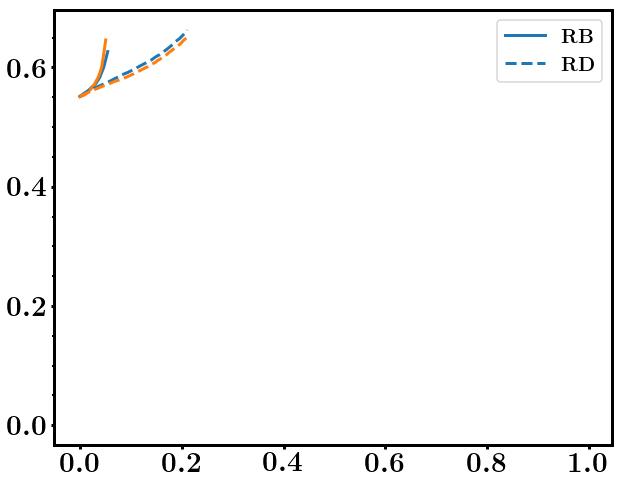

In [156]:
#plt.plot(df1.f, df1.Ngcc/1000)
#plt.plot(df2.f, df2.Sgcc, '--')

n_seeds_N = {
    125: 100,
    128: 100,
    250: 100,
    256: 100,
    500: 100,
    1000: 100
}
linestyles = ['-', '--', '-.', ':']
attacks = ['BtwU', 'DegU']#, 'BtwU_cutoff2', 'BtwU_cutoff3']
plt.figure(figsize=(10,8))
for i, attack in enumerate(attacks):
    print(attack)
    for j, N in enumerate([128, 256]):
        print(N)
        df = pd.read_csv('../networks/DT/DT_param/DT_param_N{}/properties_{}_nSeeds{}_cpp.csv'.format(
            N, attack, n_seeds_N[N]))
        if j == 0:
            label = attack_dict[attack]
        else:
            label = ''
        alpha = 0.5
        nu = 1.8
        #plt.plot(df.f, df.D/N**alpha, color=colors[j], linestyle=linestyles[i], label=label)
        #plt.plot(df.f*N**(1/(2*nu)), df.meanl/N**alpha, color=colors[j], 
        if attack == 'BtwU':
            alpha = 0.45
            nu = 1.8
            fc = 0
        else:
            alpha = 0.58
            nu = 4/3
            fc = 0.38
        #plt.plot((df.f-fc)*N**(1/(2*nu)), df.meanl/N**alpha, color=colors[j], 
        plt.plot(df.f, df.meanlw, color=colors[j], 
                 linestyle=linestyles[i], label=label)
        
    #plt.plot(df.f, df.Ngcc/N, ':', color=colors[i], label='')
#plt.yscale('log')
#plt.ylim(1, 500)
#plt.ylim(0.5, 1.5)
#plt.xlim(0, 0.5)
#plt.xlim(-1.5, 1)
X = np.arange(0, 1.1, 0.1)
#plt.plot(X, 1-X, '--', color='k')
plt.legend(loc='best', fontsize=20)
plt.show()